In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from wordcloud import WordCloud

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, QuantileRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [125]:
# List of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "MLP Regressor": MLPRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "LGBM Regressor": LGBMRegressor()
}

In [126]:
# Read the CSV file into a pandas DataFrame
claims_df = pd.read_csv('/content/claims_history_smaller.csv')

In [127]:
claims_df.columns

Index(['ClaimID', 'VehicleID', 'ClaimDate', 'CasualCode', 'CasualIssue',
       'PartCosts', 'LaborHours', 'CustomerComplaint', 'TechnicianDiagnosis',
       'RepairRecommendation'],
      dtype='object')

In [128]:
print(claims_df.dtypes)

ClaimID                  object
VehicleID                object
ClaimDate                object
CasualCode                int64
CasualIssue              object
PartCosts               float64
LaborHours              float64
CustomerComplaint        object
TechnicianDiagnosis      object
RepairRecommendation     object
dtype: object


In [129]:
# Step 1: Handle Missing Values
# Check for missing values
missing_values = claims_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ClaimID                 0
VehicleID               0
ClaimDate               0
CasualCode              0
CasualIssue             0
PartCosts               0
LaborHours              0
CustomerComplaint       0
TechnicianDiagnosis     0
RepairRecommendation    0
dtype: int64


In [130]:
# Drop rows with missing values
claims_df.dropna(inplace=True)

In [131]:
claims_df.shape

(100000, 10)

In [132]:
# Convert ClaimDate to datetime,extarct date fields and convert to numerical format
df['ClaimDate'] = pd.to_datetime(df['ClaimDate'])

df['ClaimYear'] = df['ClaimDate'].dt.year
df['ClaimMonth'] = df['ClaimDate'].dt.month
df['ClaimDay'] = df['ClaimDate'].dt.day

df['ClaimDate'] = df['ClaimDate'].astype(int) / 10**9  # Convert to seconds

In [133]:
# Label Encoding for the 'CasualIssue' column
label_encoder = LabelEncoder()
df['CasualIssue'] = label_encoder.fit_transform(df['CasualIssue'])

<ipython-input-134-fae41beeb8b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ClaimYear', data=df, palette='viridis')


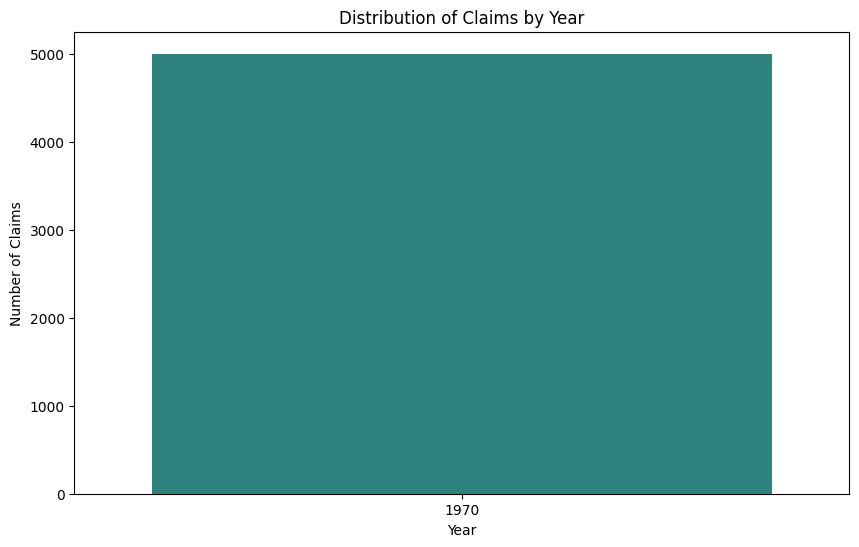

In [134]:
# Distribution of Claims by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='ClaimYear', data=df, palette='viridis')
plt.title('Distribution of Claims by Year')
plt.xlabel('Year')
plt.ylabel('Number of Claims')
plt.show()

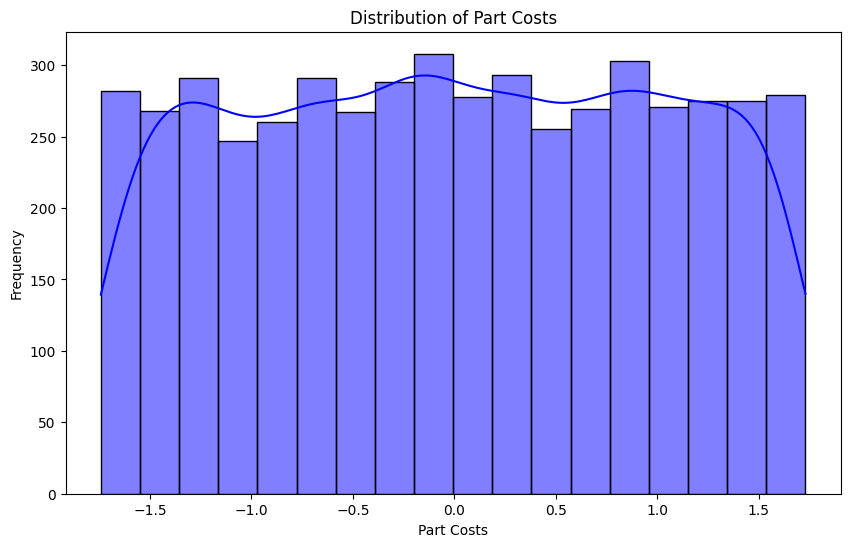

In [135]:
# 2. Distribution of Part Costs
plt.figure(figsize=(10, 6))
sns.histplot(df['PartCosts'], kde=True, color='blue')
plt.title('Distribution of Part Costs')
plt.xlabel('Part Costs')
plt.ylabel('Frequency')
plt.show()

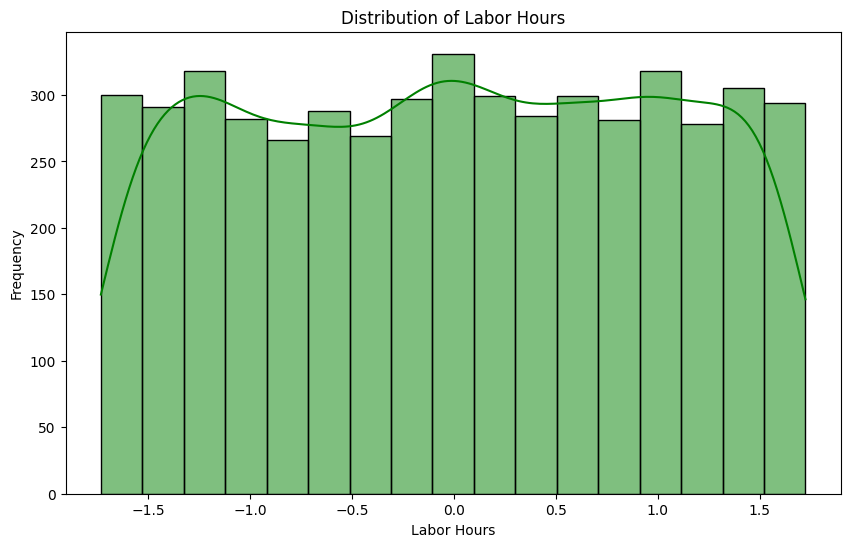

In [136]:
# 3. Distribution of Labor Hours
plt.figure(figsize=(10, 6))
sns.histplot(df['LaborHours'], kde=True, color='green')
plt.title('Distribution of Labor Hours')
plt.xlabel('Labor Hours')
plt.ylabel('Frequency')
plt.show()

In [137]:
# Normalize/Scale Numeric Features
scaler = StandardScaler()
df[['PartCosts', 'LaborHours']] = scaler.fit_transform(df[['PartCosts', 'LaborHours']])

<ipython-input-138-eaeb2328009f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='CasualIssue', data=df, palette='plasma', order=df['CasualIssue'].value_counts().index)


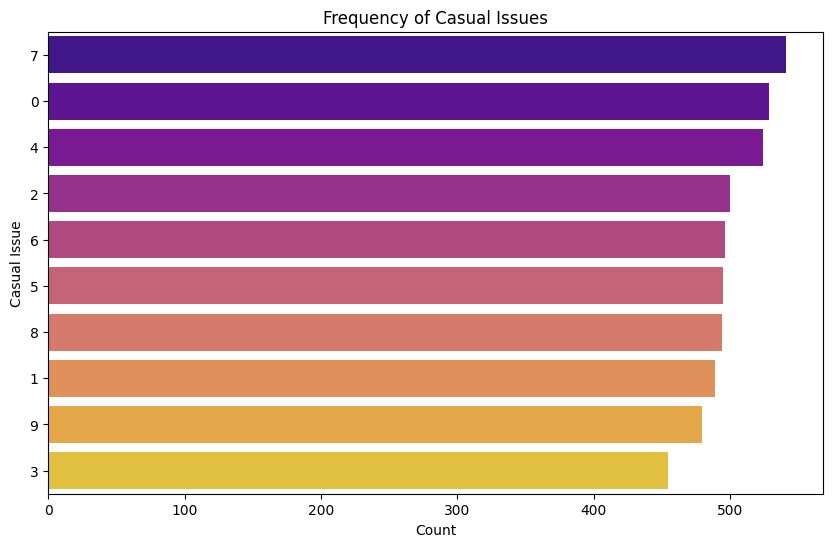

In [138]:
# Casual Issues Frequency
plt.figure(figsize=(10, 6))
sns.countplot(y='CasualIssue', data=df, palette='plasma', order=df['CasualIssue'].value_counts().index)
plt.title('Frequency of Casual Issues')
plt.xlabel('Count')
plt.ylabel('Casual Issue')
plt.show()

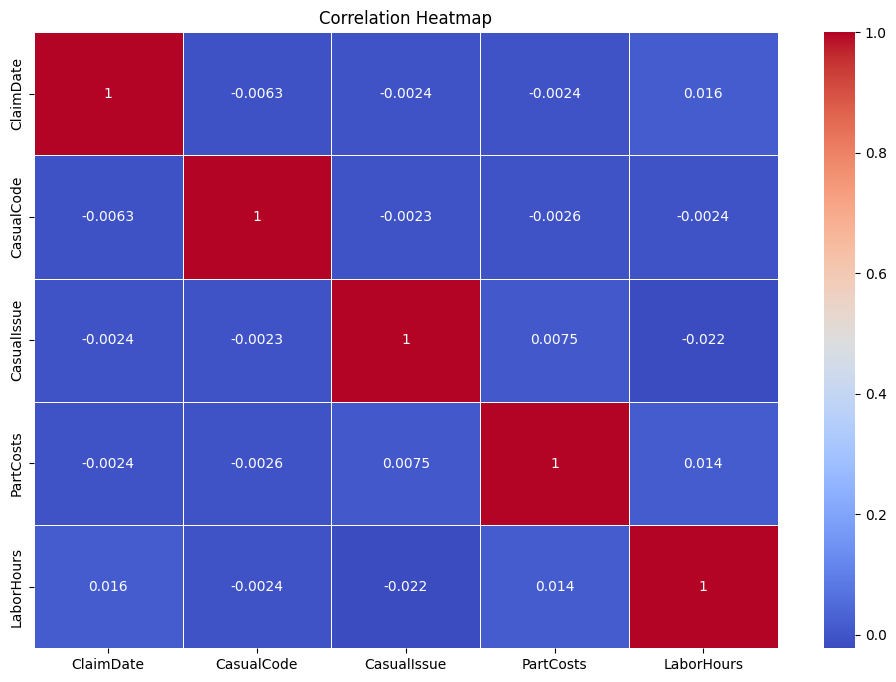

In [139]:
# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[['ClaimDate', 'CasualCode', 'CasualIssue', 'PartCosts', 'LaborHours']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [140]:
# Function to generate word cloud
def generate_word_cloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

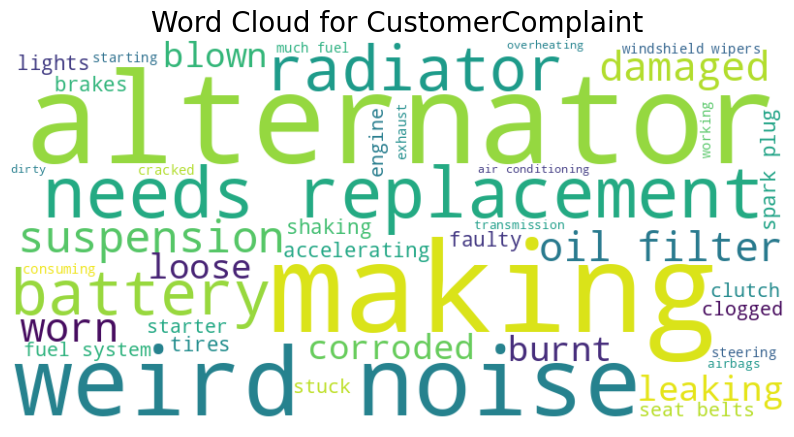

In [141]:
# Word Cloud for CustomerComplaint
generate_word_cloud(df['CustomerComplaint'], 'Word Cloud for CustomerComplaint')

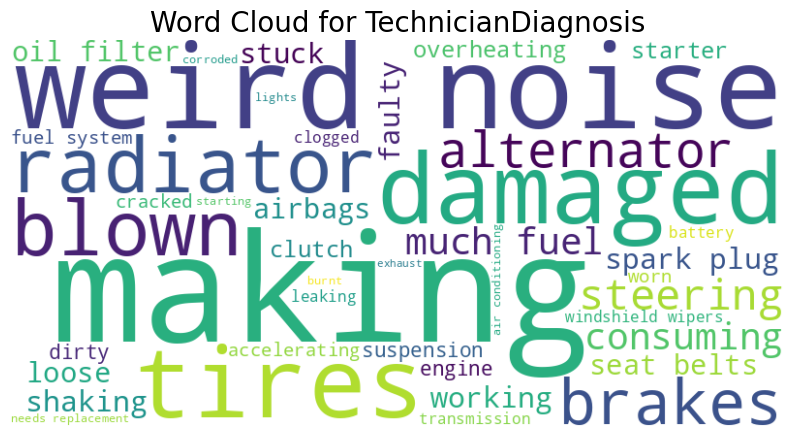

In [142]:
# Word Cloud for TechnicianDiagnosis
generate_word_cloud(df['TechnicianDiagnosis'], 'Word Cloud for TechnicianDiagnosis')

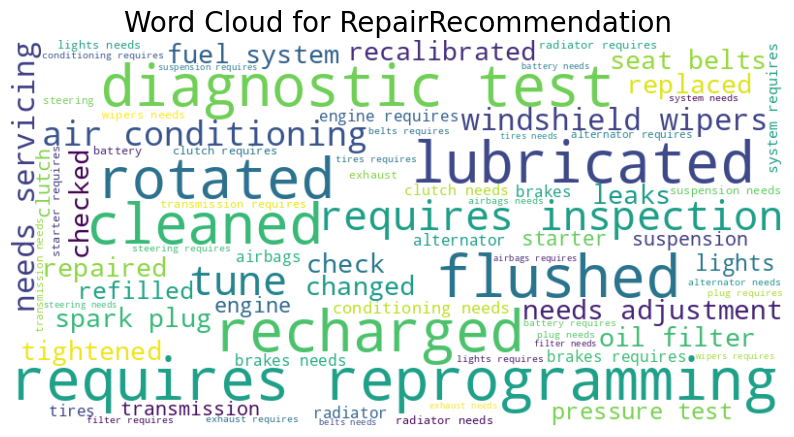

In [143]:
# Word Cloud for RepairRecommendation
generate_word_cloud(df['RepairRecommendation'], 'Word Cloud for RepairRecommendation')

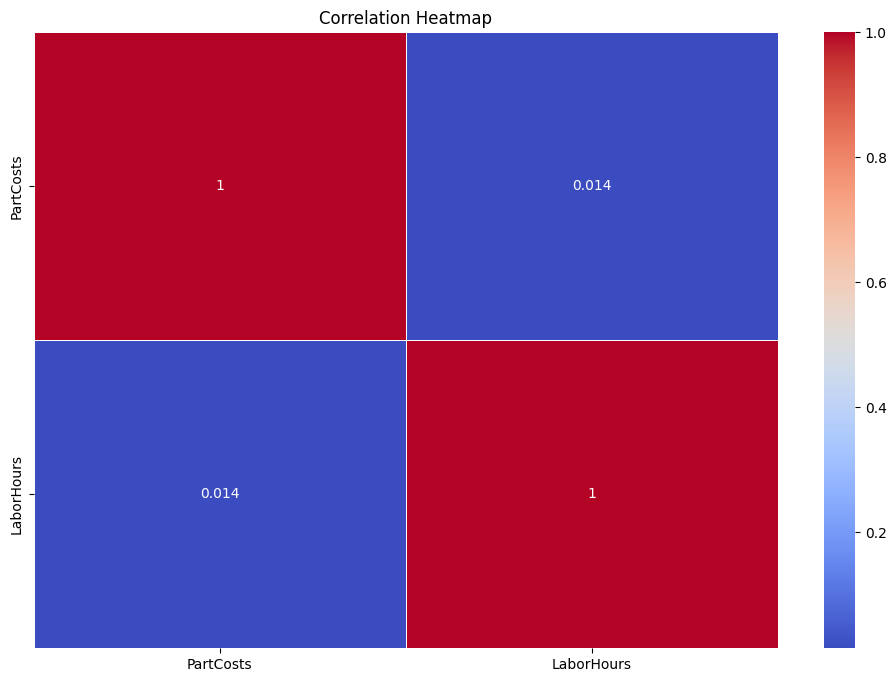

In [144]:
# Correlation Heatmap of the target variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[['PartCosts', 'LaborHours']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##Check multicollinearity of the free text features

In [145]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [146]:
# Transform the free text columns into TF-IDF features
tfidf_customer_complaint = tfidf_vectorizer.fit_transform(df['CustomerComplaint'])
tfidf_technician_diagnosis = tfidf_vectorizer.fit_transform(df['TechnicianDiagnosis'])
tfidf_repair_recommendation = tfidf_vectorizer.fit_transform(df['RepairRecommendation'])

In [147]:
# Convert TF-IDF matrices to DataFrames
df_tfidf_customer_complaint = pd.DataFrame(tfidf_customer_complaint.toarray(), columns=[f'CustomerComplaint_{i}' for i in range(tfidf_customer_complaint.shape[1])])
df_tfidf_technician_diagnosis = pd.DataFrame(tfidf_technician_diagnosis.toarray(), columns=[f'TechnicianDiagnosis_{i}' for i in range(tfidf_technician_diagnosis.shape[1])])
df_tfidf_repair_recommendation = pd.DataFrame(tfidf_repair_recommendation.toarray(), columns=[f'RepairRecommendation_{i}' for i in range(tfidf_repair_recommendation.shape[1])])

In [148]:
# Combine the TF-IDF DataFrames
tfidf_combined = pd.concat([df_tfidf_customer_complaint, df_tfidf_technician_diagnosis, df_tfidf_repair_recommendation], axis=1)

##Setup modelling

In [149]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(model, mape, rmse)
    return mape, rmse

In [150]:
final_results=[]

In [151]:
def build_model(nlp_type, X, y_part_costs, y_labor_hours):

  X.columns = ['column_' + str(col) if isinstance(col, (int, float)) else col for col in X.columns]

  # Standardize the features
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Train-test split for PartCosts
  X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(X, y_part_costs, test_size=0.2, random_state=42)

  # Train-test split for LaborHours
  X_train_lh, X_test_lh, y_train_lh, y_test_lh = train_test_split(X, y_labor_hours, test_size=0.2, random_state=42)

  global final_results

  # Evaluate models for PartCosts
  for name, model in models.items():
    mape, rmse = evaluate_model(model, X_train_pc, X_test_pc, y_train_pc, y_test_pc)
    final_results.append([nlp_type,"PartCosts", name, mape, rmse])

  # Evaluate models for LaborHours
  for name, model in models.items():
      mape, rmse = evaluate_model(model, X_train_lh, X_test_lh, y_train_lh, y_test_lh)
      final_results.append([nlp_type, "LaborHours", name, mape, rmse])

  return

In [152]:
final_results=[]

## Method 1 : Do regression analysis using Bag of Words on text fields

In [153]:
# Initialize Count Vectorizer
count_vectorizer = CountVectorizer()

In [154]:
# Transform the free text columns into BoW features
bow_customer_complaint = count_vectorizer.fit_transform(df['CustomerComplaint'])
bow_technician_diagnosis = count_vectorizer.fit_transform(df['TechnicianDiagnosis'])
bow_repair_recommendation = count_vectorizer.fit_transform(df['RepairRecommendation'])

In [155]:
# Convert BoW matrices to DataFrames
df_bow_customer_complaint = pd.DataFrame(bow_customer_complaint.toarray(), columns=[f'CustomerComplaint_{i}' for i in range(bow_customer_complaint.shape[1])])
df_bow_technician_diagnosis = pd.DataFrame(bow_technician_diagnosis.toarray(), columns=[f'TechnicianDiagnosis_{i}' for i in range(bow_technician_diagnosis.shape[1])])
df_bow_repair_recommendation = pd.DataFrame(bow_repair_recommendation.toarray(), columns=[f'RepairRecommendation_{i}' for i in range(bow_repair_recommendation.shape[1])])

In [156]:
# Combine the BoW DataFrames
df_combined = pd.concat([df[['ClaimDate', 'CasualCode', 'CasualIssue']].reset_index(drop=True),
                         df_bow_customer_complaint,
                         df_bow_technician_diagnosis,
                         df_bow_repair_recommendation], axis=1)

In [157]:
# Define X and y
X = df_combined
y_part_costs = df['PartCosts']
y_labor_hours = df['LaborHours']

In [158]:
build_model("BoW", X, y_part_costs, y_labor_hours)

LinearRegression() 2.5614928362724974 1.0212627173486646
Ridge() 2.1783148996556854 1.0174056610334898
Lasso() 1.0659771153160569 1.00543978572508
ElasticNet() 1.0659771153160569 1.00543978572508
DecisionTreeRegressor() 7.517166283254171 1.451501894638654
RandomForestRegressor() 1.7256866034946425 1.0226035519545293
ExtraTreesRegressor() 2.3333283224693586 1.140821077479354
GradientBoostingRegressor() 1.2399113915687334 1.0221697513181858
AdaBoostRegressor() 1.1651265477782826 1.0054610458783575
KNeighborsRegressor() 2.0383623264343695 1.1039472952154428
SVR() 2.903624311772055 1.038501328580715
MLPRegressor() 7.594479154582769 1.3461964322279973
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
      

In [159]:
print(len(final_results))

28


## Method 2 - TFIDF : Maps words into continuous vector space where semantically similar words are close together

In [160]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [161]:
# Transform the free text columns into TF-IDF features
tfidf_customer_complaint = tfidf_vectorizer.fit_transform(df['CustomerComplaint'])
tfidf_technician_diagnosis = tfidf_vectorizer.fit_transform(df['TechnicianDiagnosis'])
tfidf_repair_recommendation = tfidf_vectorizer.fit_transform(df['RepairRecommendation'])

In [162]:
# Convert TF-IDF matrices to DataFrames
df_tfidf_customer_complaint = pd.DataFrame(tfidf_customer_complaint.toarray(), columns=[f'CustomerComplaint_{i}' for i in range(tfidf_customer_complaint.shape[1])])
df_tfidf_technician_diagnosis = pd.DataFrame(tfidf_technician_diagnosis.toarray(), columns=[f'TechnicianDiagnosis_{i}' for i in range(tfidf_technician_diagnosis.shape[1])])
df_tfidf_repair_recommendation = pd.DataFrame(tfidf_repair_recommendation.toarray(), columns=[f'RepairRecommendation_{i}' for i in range(tfidf_repair_recommendation.shape[1])])

In [163]:
# Combine the TF-IDF DataFrames
df_combined = pd.concat([df[['ClaimDate', 'CasualCode', 'CasualIssue']].reset_index(drop=True), df_tfidf_customer_complaint, df_tfidf_technician_diagnosis, df_tfidf_repair_recommendation], axis=1)

In [164]:
# Define X and y
X = df_combined
y_part_costs = df['PartCosts']
y_labor_hours = df['LaborHours']

In [165]:
build_model("TFIDF", X, y_part_costs, y_labor_hours)

LinearRegression() 2.933642351840243 1.0290854972636887
Ridge() 1.9798289827923594 1.01747271195152
Lasso() 1.0659771153160569 1.00543978572508
ElasticNet() 1.0659771153160569 1.00543978572508
DecisionTreeRegressor() 10.159121510163002 1.430907626305418
RandomForestRegressor() 2.5614236105914063 1.0266088402346307
ExtraTreesRegressor() 3.3722727920564677 1.0626325143399422
GradientBoostingRegressor() 1.4262472689581058 1.0125946895781495
AdaBoostRegressor() 1.110537198188864 1.0049236303249398
KNeighborsRegressor() 2.181402268485077 1.1037586872443188
SVR() 2.7620811830364853 1.0407032923783168
MLPRegressor() 10.90171202217682 1.3920149887917659
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
       

In [166]:
print(len(final_results))

56


## Method 3 - Word Embeddings: Maps words into continuous vector space where semantically similar words are close together.


In [167]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [168]:
# Tokenize the text columns
df['CustomerComplaint_tokens'] = df['CustomerComplaint'].apply(word_tokenize)
df['TechnicianDiagnosis_tokens'] = df['TechnicianDiagnosis'].apply(word_tokenize)
df['RepairRecommendation_tokens'] = df['RepairRecommendation'].apply(word_tokenize)

In [169]:
# Train Word2Vec model on all tokens
all_tokens = df['CustomerComplaint_tokens'] + df['TechnicianDiagnosis_tokens'] + df['RepairRecommendation_tokens']
model_w2v = Word2Vec(all_tokens, vector_size=100, window=5, min_count=1, workers=4)

In [170]:
def get_avg_word2vec(tokens, model, vector_size):
    """ Function to average word vectors for a document """
    valid_words = [word for word in tokens if word in model.wv.index_to_key]
    if not valid_words:
        return np.zeros(vector_size)
    return np.mean([model.wv[word] for word in valid_words], axis=0)

In [171]:
# Apply the function to get document vectors
df['CustomerComplaint_w2v'] = df['CustomerComplaint_tokens'].apply(lambda x: get_avg_word2vec(x, model_w2v, 100))
df['TechnicianDiagnosis_w2v'] = df['TechnicianDiagnosis_tokens'].apply(lambda x: get_avg_word2vec(x, model_w2v, 100))
df['RepairRecommendation_w2v'] = df['RepairRecommendation_tokens'].apply(lambda x: get_avg_word2vec(x, model_w2v, 100))


In [172]:
# Concatenate all feature vectors into a single matrix
df_combined = pd.concat([df[['ClaimDate', 'CasualCode', 'CasualIssue']].reset_index(drop=True),
                         pd.DataFrame(df['CustomerComplaint_w2v'].tolist()),
                         pd.DataFrame(df['TechnicianDiagnosis_w2v'].tolist()),
                         pd.DataFrame(df['RepairRecommendation_w2v'].tolist())], axis=1)

In [173]:
# Define X and y
X = df_combined
y_part_costs = df['PartCosts']
y_labor_hours = df['LaborHours']

In [174]:
build_model("gensim word embeddings", X, y_part_costs, y_labor_hours)

LinearRegression() 1.6802161106816953 1.0434600135700207
Ridge() 1.9171294490599944 1.0141335438524601
Lasso() 1.0659771153160569 1.00543978572508
ElasticNet() 1.0659771153160569 1.00543978572508
DecisionTreeRegressor() 14.296002905372593 1.4067339693088645
RandomForestRegressor() 2.5367140826185426 1.0174881445175312
ExtraTreesRegressor() 2.315122082898454 1.023777170438036
GradientBoostingRegressor() 1.2952218908595405 1.0193204046095385
AdaBoostRegressor() 1.0585669659008508 1.0034670042920568
KNeighborsRegressor() 2.8693141371444075 1.0730281262448338
SVR() 2.2727746418028865 1.020754071438081


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor() 2.9944324879855673 1.1986237871835301
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 5.03400893608827 1.1161750376455766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[L

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor() 2.1030983874880156 1.1972051653325082
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 1.6699165222423527 1.1134361160491892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014409 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [175]:
print(len(final_results))

84


## Method 4 - Doc2Vec: An extension of Word2Vec that generates vector representations for entire documents.

In [176]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [177]:
# Tokenize the text columns
df['CustomerComplaint_tokens'] = df['CustomerComplaint'].apply(word_tokenize)
df['TechnicianDiagnosis_tokens'] = df['TechnicianDiagnosis'].apply(word_tokenize)
df['RepairRecommendation_tokens'] = df['RepairRecommendation'].apply(word_tokenize)

In [178]:
# Combine all text columns into one for doc2vec
df['CombinedText'] = df['CustomerComplaint'] + " " + df['TechnicianDiagnosis'] + " " + df['RepairRecommendation']

In [179]:
# Tag documents
documents = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(df['CombinedText'])]

In [180]:
# Train Doc2Vec model
model_d2v = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4, epochs=40)

In [181]:
# Infer vectors for each document
df['Doc2Vec'] = df['CombinedText'].apply(lambda x: model_d2v.infer_vector(word_tokenize(x)))

In [182]:
# Combine all feature vectors into a single matrix
df_combined = pd.concat([df[['ClaimDate', 'CasualCode', 'CasualIssue']].reset_index(drop=True),
                         pd.DataFrame(df['Doc2Vec'].tolist())], axis=1)

In [183]:
# Define X and y
X = df_combined
y_part_costs = df['PartCosts']
y_labor_hours = df['LaborHours']

In [184]:
build_model("Doc2Vec word embeddings", X, y_part_costs, y_labor_hours)

LinearRegression() 2.830073714131935 1.0164938500422949
Ridge() 2.6341192002516145 1.015731251847518
Lasso() 1.0659771153160569 1.00543978572508
ElasticNet() 1.0659771153160569 1.00543978572508
DecisionTreeRegressor() 14.291465038507543 1.4424089491286658
RandomForestRegressor() 3.794559509141075 1.0258129680303114
ExtraTreesRegressor() 2.7969061527819603 1.024757379515376
GradientBoostingRegressor() 2.8472457655104346 1.0239090524283891
AdaBoostRegressor() 1.0856809445477065 1.0072889391812359
KNeighborsRegressor() 4.47484765082256 1.1027642361392
SVR() 3.8484152580941884 1.063137800570358


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor() 7.6143621743893055 1.3358425108549994
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 10.0853400678919 1.1129805146517004
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[L

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor() 2.6272149022001066 1.3301564799280063
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 1.6592506207476014 1.1127895761145246
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004369 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [185]:
print(len(final_results))

112


##Method 5 - Latent Dirichlet Allocation (LDA) : A generative probabilistic model that discovers topics in a set of documents

In [186]:
from sklearn.decomposition import LatentDirichletAllocation

In [187]:
# Tokenize the text columns
df['CustomerComplaint_tokens'] = df['CustomerComplaint'].apply(word_tokenize)
df['TechnicianDiagnosis_tokens'] = df['TechnicianDiagnosis'].apply(word_tokenize)
df['RepairRecommendation_tokens'] = df['RepairRecommendation'].apply(word_tokenize)

In [188]:
# Combine all text columns into one for LDA
df['CombinedText'] = df['CustomerComplaint'] + " " + df['TechnicianDiagnosis'] + " " + df['RepairRecommendation']

In [189]:
# Initialize Count Vectorizer for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_data = count_vectorizer.fit_transform(df['CombinedText'])

In [190]:
# Train LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(text_data)

LatentDirichletAllocation(random_state=42)

In [191]:
# Transform the text data to topic distributions
lda_features = lda.transform(text_data)

In [192]:
# Combine LDA features with other numerical features
df_combined = pd.concat([df[['ClaimDate', 'CasualCode', 'CasualIssue']].reset_index(drop=True),
                         pd.DataFrame(lda_features)], axis=1)

In [193]:
# Define X and y
X = df_combined
y_part_costs = df['PartCosts']
y_labor_hours = df['LaborHours']

In [194]:
build_model("LDA", X, y_part_costs, y_labor_hours)

LinearRegression() 1.0663924285923696 1.0057914433483208
Ridge() 1.148072934310308 1.0061102566881244
Lasso() 1.0659771153160569 1.00543978572508
ElasticNet() 1.0659771153160569 1.00543978572508
DecisionTreeRegressor() 7.288321220838461 1.4297846432267074
RandomForestRegressor() 2.4797309671149685 1.0288966657625538
ExtraTreesRegressor() 1.8800050855145758 1.0655219107962393
GradientBoostingRegressor() 1.234001630827146 1.0104810058350635
AdaBoostRegressor() 1.1825245832315427 1.0070055570916465
KNeighborsRegressor() 4.0026313216963 1.1031462944370882
SVR() 2.014912358357889 1.038833366212927


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor() 1.9816104066124633 1.0458390199456808
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 4.0042549105583465 1.0854939870352383
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor() 1.2953418923485978 1.03111600364098
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 1.5813944823135264 1.091128286946899
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Li

In [195]:
print(len(final_results))

140


##Method 6 - Pre trained models - BERT

In [196]:
from transformers import BertTokenizer, BertModel
import torch

In [197]:
# Combine all text columns into one for BERT embeddings
df['CombinedText'] = df['CustomerComplaint'] + " " + df['TechnicianDiagnosis'] + " " + df['RepairRecommendation']

In [198]:
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [199]:
# Function to get BERT embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy().flatten()

In [200]:
# Apply the function to get document embeddings
df['BERT_Embeddings'] = df['CombinedText'].apply(get_bert_embeddings)

In [201]:
# Combine all feature vectors into a single matrix
df_combined = pd.concat([df[['ClaimDate', 'CasualCode', 'CasualIssue']].reset_index(drop=True),
                         pd.DataFrame(df['BERT_Embeddings'].tolist())], axis=1)

In [202]:
# Define X and y
X = df_combined
y_part_costs = df['PartCosts']
y_labor_hours = df['LaborHours']

In [203]:
build_model("BERT", X, y_part_costs, y_labor_hours)

LinearRegression() 6.253989762136196 1.1042157436978701
Ridge() 6.262800286084876 1.1001260811715887
Lasso() 1.0659771153160569 1.00543978572508
ElasticNet() 1.0659771153160569 1.00543978572508
DecisionTreeRegressor() 10.270831858133711 1.3726427274331592
RandomForestRegressor() 2.2503053545180722 1.0136220100908335
ExtraTreesRegressor() 1.2732301493211158 1.0196169917501632
GradientBoostingRegressor() 1.6445846409132436 1.0177535389723074
AdaBoostRegressor() 1.3549466501062435 1.0045998734344914
KNeighborsRegressor() 3.7111408148208476 1.0873046169863556
SVR() 3.8032355461117935 1.0526508143693534
MLPRegressor() 4.399523305906359 1.3126476282681248
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
   

In [204]:
print(len(final_results))

168


In [205]:
final_results

[['BoW',
  'PartCosts',
  'Linear Regression',
  2.5614928362724974,
  1.0212627173486646],
 ['BoW',
  'PartCosts',
  'Ridge Regression',
  2.1783148996556854,
  1.0174056610334898],
 ['BoW',
  'PartCosts',
  'Lasso Regression',
  1.0659771153160569,
  1.00543978572508],
 ['BoW', 'PartCosts', 'ElasticNet', 1.0659771153160569, 1.00543978572508],
 ['BoW',
  'PartCosts',
  'Decision Tree Regressor',
  7.517166283254171,
  1.451501894638654],
 ['BoW',
  'PartCosts',
  'Random Forest Regressor',
  1.7256866034946425,
  1.0226035519545293],
 ['BoW',
  'PartCosts',
  'Extra Trees Regressor',
  2.3333283224693586,
  1.140821077479354],
 ['BoW',
  'PartCosts',
  'Gradient Boosting Regressor',
  1.2399113915687334,
  1.0221697513181858],
 ['BoW',
  'PartCosts',
  'AdaBoost Regressor',
  1.1651265477782826,
  1.0054610458783575],
 ['BoW',
  'PartCosts',
  'K-Nearest Neighbors Regressor',
  2.0383623264343695,
  1.1039472952154428],
 ['BoW',
  'PartCosts',
  'Support Vector Regressor',
  2.9036243

In [206]:
final_df = pd.DataFrame(final_results, columns=['Technique', 'Target', 'Model', 'MAPE', 'RMSE'])

In [207]:
final_df

,Technique,Target,Model,MAPE,RMSE
0,BoW,PartCosts,Linear Regression,2.561493,1.021263
1,BoW,PartCosts,Ridge Regression,2.178315,1.017406
2,BoW,PartCosts,Lasso Regression,1.065977,1.005440
3,BoW,PartCosts,ElasticNet,1.065977,1.005440
4,BoW,PartCosts,Decision Tree Regressor,7.517166,1.451502
...,...,...,...,...,...
163,BERT,LaborHours,K-Nearest Neighbors Regressor,1.767414,1.086942
164,BERT,LaborHours,Support Vector Regressor,1.437371,1.058823
165,BERT,LaborHours,MLP Regressor,2.525650,1.326013
166,BERT,LaborHours,XGBoost Regressor,1.521180,1.089375


In [208]:
final_df.to_csv(r"results.csv", index=False)

##Method 7 - Pre trained models - GPT

In [209]:
from transformers import GPT2Tokenizer, GPT2Model
import torch

In [210]:
# Initialize GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')

In [211]:
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

In [212]:
# Function to get GPT-2 embeddings
def get_gpt_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy().flatten()

In [213]:
# Apply the function to get document embeddings
df['GPT_Embeddings'] = df['CombinedText'].apply(get_gpt_embeddings)

In [214]:
# Combine all feature vectors into a single matrix
df_combined = pd.concat([df[['CasualCode', 'CasualIssue']].reset_index(drop=True),
                         pd.DataFrame(df['GPT_Embeddings'].tolist())], axis=1)

In [215]:
# Define X and y
X = df_combined
y_part_costs = df['PartCosts']
y_labor_hours = df['LaborHours']

In [216]:
build_model("GPT", X, y_part_costs, y_labor_hours)

LinearRegression() 5.063303056409072 1.113925496447329
Ridge() 4.899561929342632 1.107792975135109
Lasso() 1.0659771153160569 1.00543978572508
ElasticNet() 1.0659771153160569 1.00543978572508
DecisionTreeRegressor() 9.450952560555619 1.4324467573348134
RandomForestRegressor() 1.8514453225814613 1.015560853361298
ExtraTreesRegressor() 1.712095197649487 1.0217778801726625
GradientBoostingRegressor() 3.0650460949411222 1.0160254857598616
AdaBoostRegressor() 1.2307166184025347 1.0057105379053715
KNeighborsRegressor() 3.477327783187238 1.1083216759241463
SVR() 3.7967686224257813 1.068766451900191
MLPRegressor() 4.8868316743561735 1.3759295135952163
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
         

In [217]:
print(final_results)

[['BoW', 'PartCosts', 'Linear Regression', 2.5614928362724974, 1.0212627173486646], ['BoW', 'PartCosts', 'Ridge Regression', 2.1783148996556854, 1.0174056610334898], ['BoW', 'PartCosts', 'Lasso Regression', 1.0659771153160569, 1.00543978572508], ['BoW', 'PartCosts', 'ElasticNet', 1.0659771153160569, 1.00543978572508], ['BoW', 'PartCosts', 'Decision Tree Regressor', 7.517166283254171, 1.451501894638654], ['BoW', 'PartCosts', 'Random Forest Regressor', 1.7256866034946425, 1.0226035519545293], ['BoW', 'PartCosts', 'Extra Trees Regressor', 2.3333283224693586, 1.140821077479354], ['BoW', 'PartCosts', 'Gradient Boosting Regressor', 1.2399113915687334, 1.0221697513181858], ['BoW', 'PartCosts', 'AdaBoost Regressor', 1.1651265477782826, 1.0054610458783575], ['BoW', 'PartCosts', 'K-Nearest Neighbors Regressor', 2.0383623264343695, 1.1039472952154428], ['BoW', 'PartCosts', 'Support Vector Regressor', 2.903624311772055, 1.038501328580715], ['BoW', 'PartCosts', 'MLP Regressor', 7.594479154582769, 1

In [218]:
final_df = pd.DataFrame(final_results, columns=['Technique', 'Target', 'Model', 'MAPE', 'RMSE'])

In [219]:
final_df.to_csv(r"results.csv", index=False)